In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
#load data
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data("/home/super-workstation/program/LearnDeepLearning/data/mnist.npz")
x_train, x_test = x_train/255.0, x_test/255.0

1.14.0


In [3]:
# setup shallow network 一个隐藏层
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 展开
print(model.output_shape)
model.add(Dense(1024, activation='relu')) # 全连接(隐藏层1)
print(model.output_shape)
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 输出
print(model.output_shape)

sgd=SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=["accuracy"]) # 编译

# train model
print(x_train.shape)
'''
model.fit(x_train, y_train, epochs=5)
'''

W0808 17:51:01.956373 140523342604096 deprecation_wrapper.py:119] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0808 17:51:01.961235 140523342604096 deprecation.py:506] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


(None, 784)
(None, 1024)
(None, 10)
(60000, 28, 28)


'\nmodel.fit(x_train, y_train, epochs=5)\n'

In [4]:
'''
predicts = model.predict(x_test)

plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(x_test[i])#, cmap=plt.cm.binary)
    pred = predicts[i].tolist()
    pred_num = pred.index(max(pred))
    plt.xlabel(pred_num)
    plt.ylabel(y_test[i])
    if pred_num != y_test[i]:
        plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.show()
'''

'\npredicts = model.predict(x_test)\n\nplt.figure(figsize=(10,10))\nfor i in range(49):\n    plt.subplot(7,7,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    #plt.imshow(x_test[i])#, cmap=plt.cm.binary)\n    pred = predicts[i].tolist()\n    pred_num = pred.index(max(pred))\n    plt.xlabel(pred_num)\n    plt.ylabel(y_test[i])\n    if pred_num != y_test[i]:\n        plt.imshow(x_test[i], cmap=plt.cm.binary)\nplt.show()\n'

In [2]:
# (!!!error)setup letnet-5 (7 layers)
# alias avg_pooling == ap
# conv1 + ap_1(5*5) + cov2 + ap_2(5*5) + full_1 + full_2 + output
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(6, (5,5), padding='same', input_shape=(28,28,1))) #1
print("conv2d_1--> ", model.output_shape)
model.add(AveragePooling2D(pool_size=(2,2)))#2
print("avg_pooling_1--> ", model.output_shape)
model.add(Conv2D(16, (5,5)))#3
print("conv2d_2--> ", model.output_shape)
model.add(Dropout(0.375))
model.add(AveragePooling2D(pool_size=(2,2)))#4
print("avg_pooling_2--> ", model.output_shape)
model.add(Flatten())
print("flatten --> ", model.output_shape)
model.add(Dense(120))#5
print("full_1 --> ", model.output_shape)
model.add(Dense(84))#6
print("full_2 --> ", model.output_shape)
model.add(Dense(10, activation='softmax'))
print('output --> ', model.output_shape)#7

# compile
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

'''
# train
import datetime
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
# train
start_tm = datetime.datetime.now()
model.fit(x_train, y_train, epochs=5)
end_tm = datetime.datetime.now()
print("cost: ", (end_tm-start_tm).seconds)

# evaluate
scores = model.evaluate(x_test, y_test)

print("loss: ", scores[0])
print("ac: ", scores[1])
'''

Using TensorFlow backend.
W0808 17:53:15.748398 139884539893568 deprecation_wrapper.py:119] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 17:53:15.758002 139884539893568 deprecation_wrapper.py:119] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 17:53:15.759613 139884539893568 deprecation_wrapper.py:119] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 17:53:15.768535 139884539893568 deprecation_wrapper.py:119] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is

conv2d_1-->  (None, 28, 28, 6)
avg_pooling_1-->  (None, 14, 14, 6)
conv2d_2-->  (None, 10, 10, 16)
avg_pooling_2-->  (None, 5, 5, 16)
flatten -->  (None, 400)
full_1 -->  (None, 120)
full_2 -->  (None, 84)
output -->  (None, 10)


'\n# train\nimport datetime\nx_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)\nx_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)\n# train\nstart_tm = datetime.datetime.now()\nmodel.fit(x_train, y_train, epochs=5)\nend_tm = datetime.datetime.now()\nprint("cost: ", (end_tm-start_tm).seconds)\n\n# evaluate\nscores = model.evaluate(x_test, y_test)\n\nprint("loss: ", scores[0])\nprint("ac: ", scores[1])\n'

In [3]:
######## Lenet5 1998 #########
# (correction)setup lenet-5 (7 layers) 原始版本
# alias avg_pooling == ap
# conv1 + ap_1(5*5) + cov2 + ap_2(5*5) + conv_3 + full_1 + output
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, Dropout, ZeroPadding2D
from keras.optimizers import SGD

from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1) # 高斯径向基函数
        res = K.exp(-1 * self.gamma * l2) # 
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

model = Sequential()
model.add(ZeroPadding2D(2, input_shape=(28,28,1)))
print("padding--> ", model.output_shape) 
#1 28×28×6
# 训练参数计算规则 （cx_size*cy_size*上一层维度（特征图个数）+1）*当前层维度
# 连接数 当前层和上一层的连接数  训练参数个数*特征图w*特征图h
# 训练参数 156 = （5×5+1）×6 
# 连接数 122304 = （5×5+1）×6×（28×28）
model.add(Conv2D(6, (5,5)))#1 
print("conv2d_1--> ", model.output_shape) 
#2 14×14×6 
#训练参数 12 6*(1+1) 当前层数（偏置+采样参数）
#连接数 5880 = （2×2 + 1）*6*(14*14)
model.add(AveragePooling2D(pool_size=(2,2)))#2
print("avg_pooling_1--> ", model.output_shape)
#3 10×10×16 
#训练参数 1516 = (3*5*5+ 1)*6 + (4*5*5+1)*6 + (4*5*5+1)*3 + (6*5*5+1)
#连接数 151600 = (3*5*5+ 1)*6×（10×10） + (4*5*5+1)*6×（10×10） + (4*5*5+1)*3*(10*10) + (6*5*5+1)*(10*10)
model.add(Conv2D(16, (5,5)))#3
print("conv2d_2--> ", model.output_shape)
#4 5*5*16
#训练参数 32 = 16*(1+1)
#连接个数 2000 = （2*2*1 + 1）*6*(5*5) 
model.add(AveragePooling2D(pool_size=(2,2)))#4
print("avg_pooling_2--> ", model.output_shape)
#5 1*1*120
#训练参数 48120 = (5*5*16 + 1)*120
#连接个数 48120 = (5*5*16 + 1)*120*(1*1)
model.add(Conv2D(120, (5,5)))#5
print("conv2d_3 --> ", model.output_shape)
model.add(Flatten())
#6 1*1*84
#训练参数 10164 = (1*1*120+1)*84
#连接个数 10164 = (1*1*120+1)*84*(1*1)
model.add(Dense(84, activation='tanh'))#6
print("full_1 --> ", model.output_shape)
#7 1*1*10
#训练参数 850 = （1*1*84+1)*10(1*1)
#连接个数 850 = （1*1*84+1)*10(1*1)
#model.add(Dense(10, activation='sigmoid'))#7
model.add(RBFLayer(10,0.5))
print('output --> ', model.output_shape)

# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import datetime
train_data = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
test_data = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
train_label = y_train
test_label = y_test

# train
start_tm = datetime.datetime.now()
model.fit(train_data, train_label, epochs=5)
end_tm = datetime.datetime.now()
print("cost: ", (end_tm-start_tm).seconds)

scores = model.evaluate(test_data, test_label)

print("loss: ", scores[0])
print("ac: ", scores[1])

padding-->  (None, 32, 32, 1)
conv2d_1-->  (None, 28, 28, 6)
avg_pooling_1-->  (None, 14, 14, 6)
conv2d_2-->  (None, 10, 10, 16)
avg_pooling_2-->  (None, 5, 5, 16)
conv2d_3 -->  (None, 1, 1, 120)
full_1 -->  (None, 84)
output -->  (None, 10)
Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.4311 - acc: 0.8831
Epoch 2/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2517 - acc: 0.9265
Epoch 3/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.2100 - acc: 0.9391
Epoch 4/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.1857 - acc: 0.9472
Epoch 5/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.1696 - acc: 0.9508
cost:  34
10000/10000 [==============================] - 0s 32us/step
loss:  0.17994914414137603
ac:  0.948


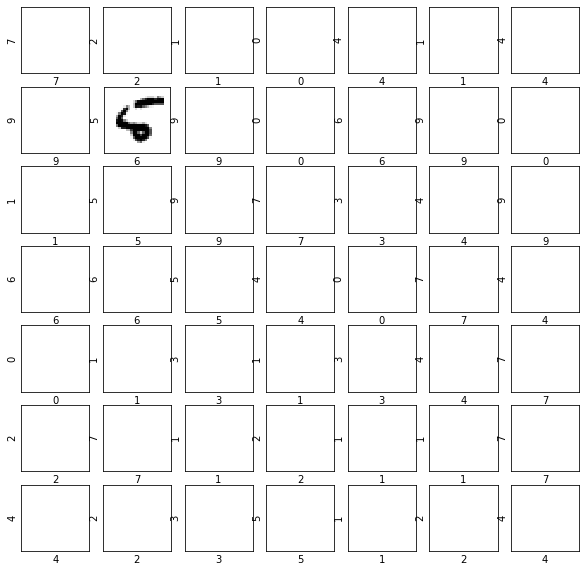

In [5]:
predicts = model.predict(test_data)

In [27]:
########## Alexnet 2012 ###################
# 8 layers 5 conv + 3 maxpool + 2 full + 1 output
import keras
from keras.layers import Conv2D, Dense, MaxPool2D
from keras.models import Sequential

model = Sequential()
# 1 
# conv1
# output dim = (227-11)/4 + 1 = 55 --> 55*55*96
model.add(Conv2D(96, (11,11), strides=4, activation='relu', input_shape=(227, 227, 1)))
print("conv_1（input）: ", model.output_shape)
# max_pool_1 27*27*96
model.add(MaxPool2D(pool_size=(3,3), strides=2))
print("max_pool_1: ", model.output_shape)
# 2
# conv2 27*27*256
model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
print("conv_2: ", model.output_shape)
# max_pool_2 13*13*256
model.add(MaxPool2D(pool_size=(3,3), strides=2))
print("max_pool_2: ", model.output_shape)
# 3
# conv3 13*13*384
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
print("conv_3: ", model.output_shape)
# 4
# conv4 13*13*384
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
print("conv_4: ", model.output_shape)
# 5
# conv5 13*13*256
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
print("conv_5: ", model.output_shape)
# max_pool_3 6*6*256
model.add(MaxPool2D(pool_size=(3,3), strides=2))
print("max_pool_3", model.output_shape)

# 6
# full_1
model.add(Conv2D(4096, (6,6), activation='relu'))
print("full_1: ", model.output_shape)
model.add(Dropout(0.5))
model.add(Flatten())
print("flatten: ", model.output_shape)
# 7
# full_2
model.add(Dense(4096, activation='relu'))
print("full_2: ", model.output_shape)
model.add(Dropout(0.5))
# full_3
model.add(Dense(1000, activation='softmax'))
print("full_3(output): ", model.output_shape)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

conv_1（input）:  (None, 55, 55, 96)
max_pool_1:  (None, 27, 27, 96)
conv_2:  (None, 27, 27, 256)
max_pool_2:  (None, 13, 13, 256)
conv_3:  (None, 13, 13, 384)
conv_4:  (None, 13, 13, 384)
conv_5:  (None, 13, 13, 256)
max_pool_3 (None, 6, 6, 256)
full_1:  (None, 1, 1, 4096)
flatten:  (None, 4096)
full_2:  (None, 4096)
full_3(output):  (None, 1000)


info:
image size -->  227 x 227
channels -->  3


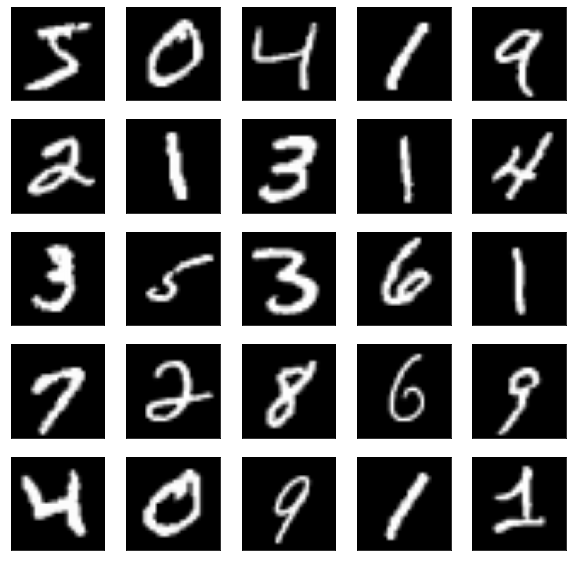

In [8]:
#from skimage.transform import resize
from dpl import utils

dims = 227
train_nums = 1000
test_nums = 500
#print(x_train[0].shape)
#image_resized = resize(x_train[0], 256, 256)
#plt.imshow(x_train[0], cmap=plt.cm.binary)

#print(type(res))
#plt.imshow(res, cmap=plt.cm.binary)
alex_train_label = y_train[:train_nums]
alex_test_label = y_test[:test_nums]

alex_train_data = utils.preprocess4Alexnet(x_train, train_nums, dsize=(dims, dims))
alex_test_data = utils.preprocess4Alexnet(x_test, test_nums, dsize=(dims, dims))

#utils.showImages(alex_train_data)
#utils.showImages(alex_test_data)
#dpl.showImages(x_train)
#showImages(x_test)

#print(type(res_data_train))
#plt.imshow(alex_train_data[train_nums - 1], cmap=plt.cm.binary)
#plt.imshow(alex_test_data[test_nums - 1], cmap=plt.cm.binary)

In [11]:
from dpl.alexnet import data_io
data_io.save_data("../data/alex_mnist_data_" + str(dims) + ".npz", 
                 alex_train_data, alex_train_label,
                 alex_test_data, alex_test_label)

In [16]:

(train_data, train_label),(test_data, test_label) = load_data("../data/alex_mnist_data_" + str(dims) + ".npz")
print(type(train_data))
print(train_data.shape, " ", train_label.shape, " ", test_data.shape, " ", test_label.shape)

<class 'numpy.ndarray'>
(1000, 256, 256)   (1000,)   (500, 256, 256)   (500,)
